# Sentiment Analisys - IMDB Movies Review

The main goal of this project is to show how we can classify movies review (free text in English) as positive and negative. Although the subject considered here refers to movies, this approach can be used in several different contexts (e.g., customer satisfaction, product review, etc.).

My goal is to show how NLP techniques can be used to preprocess the dataset in order to use sklearn models to classify film reviews. 

### Contents
1. [Method](#Method)
2. [Importing Data](#Importing-Data)
3. [Cleaning the Dataset](#Cleaning-the-Dataset)
4. [Preparing the Dataset: Using bag of words](#Preparing-the-Dataset:-Using-bag-of-words)
5. [Preparing Dataset: TFIDF](#Preparing-Dataset:-TFIDF)
5. [Classification Models](#Classification-Models)
6. [Comparison](#Comparison)
7. [Conslusion](#Conclusion)

## Method

To accomplish the goals of this project, I followed these steps:
![fig](images/method.png)

1. The dataset is imported from a public source (i.e., kaggle);
2. I preprocess the dataset to simplify the classification process (e.g., I remove stopwords and apply lemmatization);
3. Then, I extract features from reviews using the Bag of Words technique. This transformed dataset is used to train (and evaluate) different classifiers;
4. I also extract features from reviews using the TFIDF technique, which generates a dataset to train (and evaluate) different classifiers;
5. Finally, the performance of all models are compared.

## Importing Data

This dataset can be accessed at [kaggle](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?select=IMDB+Dataset.csv). The data is composed of 50,000 reviews (25,000 positive and 25,000 negative).

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()

C:\Users\neto\anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
df = pd.read_csv('data/IMDB Dataset.csv')

In [3]:
df

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

In [4]:
df['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [5]:
df['target'] = df['sentiment'].replace({'positive':1, 'negative':0})
df['target'].value_counts()

1    25000
0    25000
Name: target, dtype: int64

## Cleaning dataset

In [6]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

wnl = WordNetLemmatizer()
def text_cleaning(row):
    global wnl
    tokens = word_tokenize(row['review'])
    # removing stopwords
    tokens = [t for t in tokens if t not in stopwords.words("english")]
    row['review'] = ' '.join(tokens)
    return row
df = df.progress_apply(text_cleaning, axis=1)


100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [1:29:11<00:00,  9.34it/s]


In [7]:
y = df['target'][:]

### Preparing the Dataset: Using bag of words

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')
%time vectorized_bag_of_words = count_vect.fit_transform(df['review'].values)
train_df1 = vectorized_bag_of_words

Wall time: 6.98 s


### Preparing Dataset: TFIDF

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer

tf_transformer = TfidfTransformer().fit(train_df1)
df_tfidf = tf_transformer.transform(train_df1)
train_df2 = df_tfidf

### Classification Models

In [10]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

# Models to be used with bag of wrods
m1 = RandomForestClassifier(n_jobs=-1)
m2 = ExtraTreesClassifier(n_jobs=-1)
m3 = KNeighborsClassifier(n_jobs=-1)


# Models to be used with TF-IDF
m4 = RandomForestClassifier(n_jobs=-1)
m5 = ExtraTreesClassifier(n_jobs=-1)
m6 = KNeighborsClassifier(n_jobs=-1)

In [11]:
model_names = [
    'RandomForestClassifier + BagOfWords',
    "ExtraTreesClassifier + BagOfWords",
    "KNeighborsClassifier + BagOfWords",
    "RandomForestClassifier + TF-IDF",
    "ExtraTreesClassifier + TF-IDF",
    "KNeighborsClassifier + TF-IDF",
]

all_models = [m1,m2,m3,m4,m5,m6]

In [12]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
crossvalidation_acc = {}
for i in range(len(all_models)):
    evaluated_model = all_models[i]
    name = model_names[i]
    print('evaluating ', name, '...')
    X_train = None
    if i<3:
        X = train_df1 # bag of words
    else:
        X = train_df2 # TF-IDF
    results = cross_val_score(evaluated_model, X, y, cv=5)
    crossvalidation_acc[name] = np.mean(results)
    print('done! ({})'.format(np.mean(results)))

evaluating  RandomForestClassifier + BagOfWords ...
done! (0.8569599999999999)
evaluating  ExtraTreesClassifier + BagOfWords ...
done! (0.8713600000000001)
evaluating  KNeighborsClassifier + BagOfWords ...
done! (0.5962400000000001)
evaluating  RandomForestClassifier + TF-IDF ...
done! (0.8577199999999999)
evaluating  ExtraTreesClassifier + TF-IDF ...
done! (0.8711399999999999)
evaluating  KNeighborsClassifier + TF-IDF ...
done! (0.77248)


### Comparison

Text(0, 0.5, 'Accuracy (Crossvalidation)')

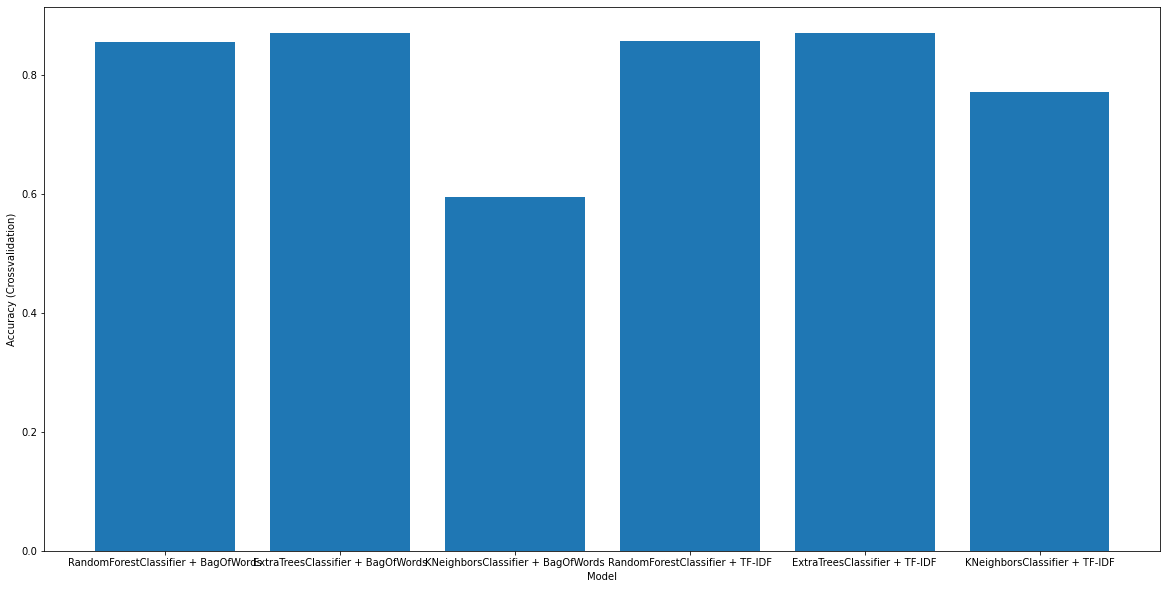

In [13]:
import matplotlib.pyplot as plt
xs = []
ys = []
for k,v in crossvalidation_acc.items():
    xs.append(k)
    ys.append(v)
plt.figure(figsize=(20,10))
plt.bar(xs, ys)
plt.xlabel('Model')
plt.ylabel('Accuracy (Crossvalidation)')

The results showed that TFID improved the accuracy of most models compared to the bag of words strategy. However, the best model was the RandomForest trained with the bag of words. Note that even without hyperparameter tuning or extensive experimentation (e.g., the inclusion of several models), the accuracy of most models is above 85%. This shows that we have an accurate baseline to move forward and train models with different parameters - which are likely to increase the accuracy.

### Conclusion

Using a simple Bag of Words/TF-IDF approach, the models presented interesting results. This highlights the power of such technique and shows we can perform similar analysis with several data sources.

However, note that the performance achieved can be improved. To accomplish that, I intend to use keras/tensorflow with word embedding in the next project with the same data.